## **Analysis and Prediction of Semiconductor Manufacturing Yield** 
___            


### Internship Details

- **Organization:** Corizo Edutech Pvt. Ltd.  
- **Intern Name:** Gaurav Aryan
- **Project Type:** Machine Learning & Data Analysis 
- **Dataset:** Semiconductor Sensor Data (Pass/Fail Yield)
___


## 1. Project Objective

The objective of this project is to analyze semiconductor manufacturing sensor data and build a machine learning model to predict whether a production unit will pass or fail quality testing. Using Python and various data analysis and machine learning techniques, this project aims to:

- Understand and explore high-dimensional sensor data collected during the manufacturing process.
- Perform data cleaning and preprocessing to handle missing values and irrelevant features.
- Analyze the distribution and relationships between sensor measurements.
- Address class imbalance in the dataset to improve model performance.
- Build and evaluate multiple supervised machine learning models for yield prediction.
- Identify the most suitable model based on performance and practical considerations.

## 2. Tools & Technologies

- **Programming Language:** Python 3.x  
- **Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Imbalanced-learn


In [46]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
import joblib


The required Python libraries for data analysis, visualization, and machine learning are imported in this step. These libraries will be used throughout the project for data preprocessing, model building, evaluation, and saving the final model.
___

## 1. Import the dataset

In [68]:
df = pd.read_csv("signal-data.csv")

In [69]:
df.shape


(1567, 592)

In [70]:
df.head()


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


On examining the dataset, it was observed that each manufacturing unit is associated with a large number of sensor measurements. Such high-dimensional data can lead to redundancy and noise, which may affect model performance. Therefore, reducing or selecting relevant features will be considered later in the project.
___

## 2. Target Variable Identification

In this step, the target variable representing the yield outcome (Pass/Fail) is identified. Understanding the target variable is essential before performing any preprocessing or model training.


In [72]:
df.columns


Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

**Identifying the target column**

In [73]:
df.columns[-1]


'Pass/Fail'

**Renaming the target column**

In [74]:
df.rename(columns={df.columns[-1]: "target"}, inplace=True)


**Verifying target values**

In [75]:
df["target"].value_counts()


target
-1    1463
 1     104
Name: count, dtype: int64

The target column represents the final yield outcome of the manufacturing process. A value of -1 corresponds to a unit that has passed the quality test, while a value of 1 indicates a failed unit. This binary variable will be used as the output for the classification models built later in the project.
___

## 3. Missing Value Analysis and Data Cleaning

Before building any machine learning model, it is important to check the dataset for missing values and handle them appropriately to avoid issues during training and evaluation.


In [76]:
df.isnull().sum().sum()


np.int64(41951)

  **Checking missing values per column**

In [77]:
df.isnull().sum().sort_values(ascending=False).head(10)


293    1429
292    1429
157    1429
158    1429
492    1341
220    1341
85     1341
358    1341
518    1018
382    1018
dtype: int64

**handling missing values**

In [78]:
df.fillna(df.select_dtypes(include=[np.number]).median(), inplace=True)


**Verifying missing values are handled**

In [79]:
df.isnull().sum().sum()


np.int64(0)

Missing values in the dataset were handled by replacing them with the median value of the respective features. The median was selected as it is less sensitive to extreme values and provides a reasonable estimate for the missing entries without significantly altering the data distribution.
___

## 4. Target Variable Distribution

In this section, the distribution of the target variable is analysed to check whether the dataset is balanced or imbalanced. Class imbalance can significantly affect the performance of classification models.


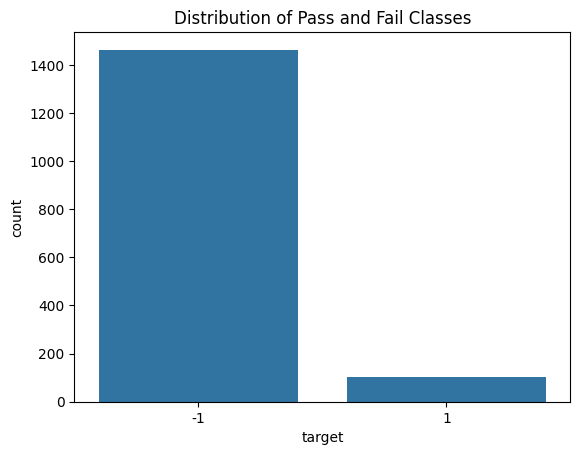

In [80]:
sns.countplot(x=df["target"])
plt.title("Distribution of Pass and Fail Classes")
plt.show()


In [61]:
df["target"].value_counts()


target
-1    1463
 1     104
Name: count, dtype: int64

From the distribution of the target variable, it is clear that the dataset is imbalanced, with a higher number of passing units compared to failing ones. Such imbalance can lead to biased model predictions. To reduce this effect, appropriate techniques for handling class imbalance will be applied during preprocessing.
___

## 5. Feature and Target Separation

In this step, the dataset is divided into input features and the target variable. This separation is required before applying any preprocessing techniques or training machine learning models.


In [90]:
X = df.drop("target", axis=1)
y = df["target"]


**confirming separation was done correctly**

In [91]:
X.shape, y.shape


((1567, 591), (1567,))

All sensor-related columns were considered as input features, while the target column represents the final yield outcome. This separation ensures that the machine learning models are trained using only sensor information and do not directly use the target values during learning.
___

## 6. Handling Class Imbalance

Since the target variable is imbalanced, a resampling technique is applied to balance the classes. This helps improve the model’s ability to correctly identify both passing and failing units.


**Identify non-numeric columns**

In [92]:
X.dtypes


Time     object
0       float64
1       float64
2       float64
3       float64
         ...   
585     float64
586     float64
587     float64
588     float64
589     float64
Length: 591, dtype: object

**Removing non-numeric features**

In [93]:
X_numeric = X.select_dtypes(include=[np.number])


**Applying SMOTE**

In [94]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_numeric, y)


**Verifying balancing**

In [95]:
y_resampled.value_counts()


target
-1    1463
 1    1463
Name: count, dtype: int64

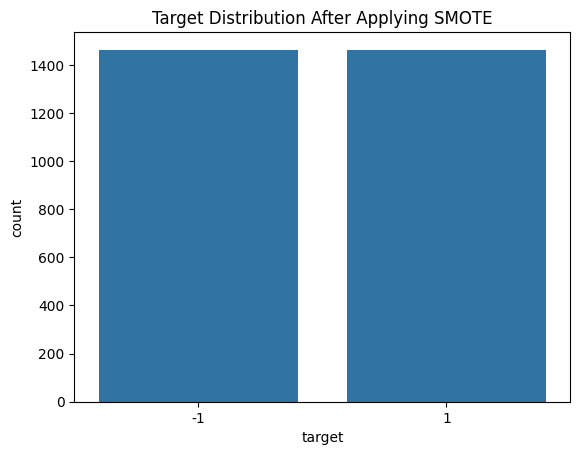

In [96]:
sns.countplot(x=y_resampled)
plt.title("Target Distribution After Applying SMOTE")
plt.show()


Before applying SMOTE, non-numeric columns such as timestamp information were removed from the dataset since SMOTE works only with numerical data. The resampling technique was then applied to the numeric sensor features to balance the pass and fail classes.
___

## 7. Train–Test Split

In this step, the resampled dataset is divided into training and testing sets. This allows the model to be trained on one portion of the data and evaluated on unseen data to assess its generalization performance.


In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42
)


**confirming the split worked correctly**

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2340, 590), (586, 590), (2340,), (586,))

The dataset was divided into training and testing sets using an 80:20 split. The training data is used to train the machine learning models, while the test data is kept separate to evaluate how well the models perform on unseen samples
___

## 8. Feature Scaling

Feature scaling is applied to standardize the input variables so that all features contribute equally to the model training process. This is particularly important for distance-based and gradient-based algorithms.


In [99]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [100]:
X_train_scaled.mean(), X_train_scaled.std()


(np.float64(2.246114830176023e-16), np.float64(0.896320160717405))

Standardization was applied using StandardScaler so that all features have zero mean and unit variance. The scaler was fitted only on the training data and then used to transform the test data to avoid any data leakage.
___

## 9. Logistic Regression Model

Logistic Regression is used as a baseline classification model in this project. It provides a simple and interpretable approach to evaluate how well the sensor data can predict the yield outcome.


In [101]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [102]:
y_pred_lr = lr.predict(X_test_scaled)


In [103]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.9197952218430034
              precision    recall  f1-score   support

          -1       1.00      0.85      0.92       306
           1       0.86      1.00      0.92       280

    accuracy                           0.92       586
   macro avg       0.93      0.92      0.92       586
weighted avg       0.93      0.92      0.92       586



Logistic Regression was used as a baseline model to understand the initial performance of the classification task. Although the model is simple and interpretable, it may not capture complex and non-linear patterns present in high-dimensional sensor data
___

## 10. Random Forest Model

Random Forest is an ensemble learning method that combines multiple decision trees to improve prediction performance and reduce overfitting. It is well suited for high-dimensional and noisy datasets such as semiconductor sensor data.


In [104]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20]
}

grid_rf = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;

In [105]:
best_rf = grid_rf.best_estimator_
grid_rf.best_params_


{'max_depth': None, 'n_estimators': 100}

In [106]:
y_pred_rf = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.9897610921501706
              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       306
           1       0.99      0.99      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586



The Random Forest model performed better than Logistic Regression on this dataset. Its ability to capture non-linear relationships and interactions between features makes it more suitable for high-dimensional sensor data.
___

## 11. Support Vector Machine (SVM)

Support Vector Machine is a powerful classification algorithm that performs well in high-dimensional feature spaces. In this project, SVM is used to compare its performance with other models for yield prediction.


In [107]:
svm = SVC(kernel="rbf")
svm.fit(X_train_scaled, y_train)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [108]:
y_pred_svm = svm.predict(X_test_scaled)


In [109]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.9948805460750854
              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       306
           1       0.99      1.00      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      1.00      0.99       586
weighted avg       0.99      0.99      0.99       586



The SVM model achieved the best performance among the evaluated models and required significantly less training time compared to Random Forest. However, it still requires careful parameter tuning, which should be considered when applying the model to similar datasets.

___

## 12. Model Comparison

In this section, the performance of all the trained models is compared based on their accuracy. This comparison helps in selecting the most suitable model for the yield prediction task.


In [110]:
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ]
})

model_comparison


,Model,Accuracy
0,Logistic Regression,0.919795
1,Random Forest,0.989761
2,SVM,0.994881


From the comparison, SVM achieved the highest accuracy while also requiring significantly less training time compared to Random Forest. Although Random Forest produced comparable accuracy, it required substantially higher computation time. Logistic Regression served as a baseline model with lower performance.
___

## 13. Final Model Selection

Based on the experimental results, the Support Vector Machine (SVM) model was selected as the final model for this project. SVM achieved the highest accuracy among the evaluated models while also requiring significantly less training time compared to Random Forest. Although Random Forest showed strong performance, its higher computational cost made it less efficient for this dataset. Therefore, considering both accuracy and execution time, SVM was chosen as the most suitable model for yield prediction.
___

## 14. Model Saving

The final selected model is saved for future use so that it can be loaded and used for prediction without retraining.


In [111]:
joblib.dump(svm, "final_svm_model.pkl")


['final_svm_model.pkl']

___

## 15. Conclusion

In this project, semiconductor manufacturing sensor data was analysed with the objective of predicting whether a production unit would pass or fail quality testing. The initial stages of the work focused on understanding the structure of the dataset and addressing key preprocessing challenges such as missing values, class imbalance, and the presence of high-dimensional sensor features. These steps were essential to ensure that the data was suitable for machine learning analysis.

Multiple classification models were trained and evaluated, including Logistic Regression, Random Forest, and Support Vector Machine (SVM). Logistic Regression provided a useful baseline, while Random Forest demonstrated strong performance by capturing non-linear relationships within the data. However, the SVM model achieved the highest accuracy while also requiring significantly less training time compared to Random Forest. Considering both performance and computational efficiency, SVM was selected as the final model for yield prediction.

Overall, the results of this project indicate that machine learning techniques can be effectively applied to semiconductor manufacturing data to support yield prediction and process monitoring. Such models can assist engineers in identifying potential issues earlier in the production process. In future work, further improvements could be achieved by applying advanced feature selection techniques, exploring dimensionality reduction methods, or performing more extensive hyperparameter tuning to enhance model robustness.

One limitation of this study is that feature importance analysis was not explored in detail, which could provide additional insights into the most influential sensor variables.
___